<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/2_Track_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Performing Data Interrogation and EDA:**
Viewing trends in perceptions among police staff at baseline and endline of the test and examine relationships between station characteristics and police attitudes about gender.  This code leverages the CSV police_outer_person_data.csv created by the "Merging_Data_For_Q5_Analysis.ipynb"

Summarizing Approach Key Findings and Potential Next Steps Here:



**High Level Approach:**

*   Focused on police survey respondents with answers at baseline and endline
*   Created 2 new attributes using the numeric 'sensitivity' index created by the authors (absolute difference in sensitivity score and flag denoting an increase in sensitivity score from baseline to endline, both at the responder level)
*   Examined distributions of perception response data at baseline and endline across treatment and control data
*   Ran a series of summary analysis examining binned versions of station characteristics with changes in police perceptions

***Key Findings to Date***

*   Police staff felt stations were effective or very effective in dealing with women related cases at both baseline (i.e., already / pre-study) and endline
*   Police staff believed that women staff were more effective at addressing women related cases, but didn't think hiring more female staff would help (somewhat contradictory and reflective of male-dominated culture)
*   Police conveyed that the felt "too much attention" was paid to womens related cases at baseline and endline.
*   There are some indications that certain station characteristics were associated with changes in sensitivity (i.e., stations with more staff ane more officers were least likely to see improvement in sensitivity and urban stations ... in fact, it appears to have declined at larger, urban stations).

***Next Steps***


*   Focused analysis to determine the interaction/multi-variabke effects of station characteristics on perceoption changes.



Import Required Libraries

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a special library for working with tables:
from tabulate import tabulate


### Reading in the data
The data is police_outer_person_data.csv (created in separate notebook " Final_Project_Merging_Data_for_Q5_Analysis_ipynb")

In [ ]:
# the code below allows you to access your Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data file created in the Q5_data_prep notebook is located here
# contains an outer join of the baseline and full police survey data with the police personnel data appended to each row
inputfile1 = "/content/drive/My Drive/Colab Notebooks/Final Project/Data/police_outer_person_data.csv"


# Read the CSV file into a dataframes
police_person_data = pd.read_csv(inputfile1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initial Sample Records and Descriptive Stats of the Data


In [ ]:
# Use `head()` to get an overview of the first few records in the dataset
print ('Police Survey + Personnel Data Records')
police_person_data.head(5)

Police Survey + Personnel Data Records


,Unnamed: 0_x,b_uid,gender_x,b_pol_impt_x,b_thana_impt_x,b_wcase_x,b_effective_x,b_helpful_x,b_add_officer_x,b_add_female_x,...,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
2,125.0,2141762.0,m,0.0,0.0,enough attention,very effective,helpful,more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
3,121.0,2141764.0,m,0.0,0.0,too much attention,very effective,very helpful,much more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN


In [ ]:
# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",police_person_data.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_b_uid_keys = police_person_data['b_uid'].nunique()
distinct_uid_keys = police_person_data['uid'].nunique()
distinct_pscode_keys = police_person_data['ps_code'].nunique()

print("Distinct b_uid keys:", distinct_b_uid_keys)
print("Distinct uid keys:", distinct_uid_keys)
print("Distinct PS Code keys:", distinct_pscode_keys)

# Check Data Types of Columns in the Dataframe;

police_person_data.info(verbose=True)

Rows and Column Count, Police Survey + Personnel Data: (2843, 108)
Distinct b_uid keys: 1950
Distinct uid keys: 2032
Distinct PS Code keys: 180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 108 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    Unnamed: 0_x              float64
 1    b_uid                     float64
 2    gender_x                  object 
 3    b_pol_impt_x              float64
 4    b_thana_impt_x            float64
 5    b_wcase_x                 object 
 6    b_effective_x             object 
 7    b_helpful_x               object 
 8    b_add_officer_x           object 
 9    b_add_female_x            object 
 10   b_female_better_x         object 
 11   b_sensitivity_x           float64
 12   uid                       float64
 13   attrit                    float64
 14   ps_code_x                 float64
 15   population_x              float64
 16   urban_x               

The dataframe has b_uid for respondents and baseline and uid for respondents at endline.   Police personnel data is duplicated across each record and is at the ps_code level.   Next, we limit the data to the percpetion and station characterisitic data columns required for EDA.

In [ ]:
# Create a new dataframe keeping on the key attributes for the analysis:  police perception data at baseline and endline + police station characteristics.


# Sensitivity attributes to keep at baseline -> 'b_wcase_x','b_effective_x','b_helpful_x','b_add_officer_x','b_add_female_x','b_female_better_x','b_sensitivity_x'
# Sensitivity attributes to keep at endline -> 'e_wcase,'  'e_effective','  e_helpful',  'e_add_officer',  'e_add_female',  'e_female_better',  'e_sensitivity_x'
# Police Station characteristics to keep -> 'population','urban','dist_urban','women_whd','treatment', 'b_total_staff','b_female_staff','b_male_staff', 'b_total_officers','b_female_officers','b_male_officers', 'e_total_staff','e_female_staff','e_male_staff','e_total_officers','e_female_officers','e_male_officers'
# ids to keep > 'b_uid,'  'uid' , 'ps_code', 'attrit'

atts_to_keep = ['b_uid' , 'uid' , 'ps_code', 'attrit','b_wcase_x','b_effective_x','b_helpful_x','b_add_officer_x','b_add_female_x','b_female_better_x','b_sensitivity_x','e_wcase' , 'e_effective' ,'e_helpful',  'e_add_officer',  'e_add_female',  'e_female_better',  'e_sensitivity', 'population','urban','dist_urban','women_whd','treatment', 'b_total_staff','b_female_staff','b_male_staff', 'b_total_officers','b_female_officers','b_male_officers', 'e_total_staff','e_female_staff','e_male_staff','e_total_officers','e_female_officers','e_male_officers' ]

# New Dataframe Creation.

q5_eda_df = police_person_data[atts_to_keep]

# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",q5_eda_df.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_b_uid_keys = q5_eda_df['b_uid'].nunique()
distinct_uid_keys = q5_eda_df['uid'].nunique()
distinct_pscode_keys = q5_eda_df['ps_code'].nunique()

print("Distinct b_uid keys:", distinct_b_uid_keys)
print("Distinct uid keys:", distinct_uid_keys)
print("Distinct PS Code keys:", distinct_pscode_keys)

# Check Data Types of Columns in the Dataframe;

q5_eda_df.info(verbose=True)

Rows and Column Count, Police Survey + Personnel Data: (2843, 35)
Distinct b_uid keys: 1950
Distinct uid keys: 2032
Distinct PS Code keys: 180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   b_uid              1950 non-null   float64
 1   uid                2032 non-null   float64
 2   ps_code            2843 non-null   float64
 3   attrit             1950 non-null   float64
 4   b_wcase_x          1948 non-null   object 
 5   b_effective_x      1943 non-null   object 
 6   b_helpful_x        1947 non-null   object 
 7   b_add_officer_x    1948 non-null   object 
 8   b_add_female_x     1949 non-null   object 
 9   b_female_better_x  1947 non-null   object 
 10  b_sensitivity_x    1945 non-null   float64
 11  e_wcase            1948 non-null   object 
 12  e_effective        1959 non-null   object 
 13  e_helpful          1958 n

Dataframe now contains the police survey perception data at baseline ("b_ columns), at endline ("e_" attributes) and police station characteristics including urban flag, surrounding population size served, and staff size and gender composition

In [ ]:
# For numeric columns (the default selection), round to 2 decimal places for better readability.
numeric_summary_stats = q5_eda_df.describe().round(2)
# Print the numeric summaries:
print("Numeric Summary Statistics: (vertical)")
display(numeric_summary_stats)

# For categorical columns, include 'object' (strings), 'category', and 'bool' (true/false) types.
print("\nCategorical Summary Statistics: (vertical)")
categorical_summary_stats = q5_eda_df.describe(include = ['object', 'category', 'bool'])
# Print the categorical summaries:
display(categorical_summary_stats)

# Transpose the summary statistics tables (turn them sideways) to make them more readable, using .T
numeric_summary_stats_transposed = numeric_summary_stats.T
categorical_summary_stats_transposed = categorical_summary_stats.T

# Display the transposed summary statistics
print("\nNumeric Summary Statistics: (transposed)")
display(numeric_summary_stats_transposed)

print("\nCategorical Summary Statistics: (transposed)")
display(categorical_summary_stats_transposed)

Numeric Summary Statistics: (vertical)


,b_uid,uid,ps_code,attrit,b_sensitivity_x,e_sensitivity,population,dist_urban,women_whd,b_total_staff,...,b_male_staff,b_total_officers,b_female_officers,b_male_officers,e_total_staff,e_female_staff,e_male_staff,e_total_officers,e_female_officers,e_male_officers
count,1950.00,2032.00,2843.00,1950.00,1945.00,1961.00,2843.00,2843.00,2843.00,2843.00,...,2843.00,2843.00,2843.00,2843.00,2843.00,2843.00,2843.00,2843.00,2843.00,2843.00
mean,2621708.63,2622835.95,5918.99,0.42,7.04,7.54,128225.85,8.68,0.32,45.06,...,41.92,9.28,0.77,8.51,53.19,5.19,48.00,9.91,0.99,8.92
std,309351.97,307605.61,3156.53,0.49,2.45,2.55,85764.57,4.96,0.47,21.01,...,19.77,5.06,0.95,4.66,23.66,3.00,21.72,4.82,0.92,4.50
min,2141761.00,2141731.00,1001.00,0.00,1.00,0.00,23565.00,1.00,0.00,9.00,...,8.00,0.00,0.00,0.00,17.00,0.00,15.00,2.00,0.00,1.00
25%,2356266.25,2357241.75,3047.00,0.00,5.00,6.00,75000.00,4.00,0.00,27.00,...,24.00,5.00,0.00,5.00,33.00,3.00,29.00,6.00,0.00,5.00
50%,2553965.50,2554035.50,5092.00,0.00,7.00,7.00,110000.00,8.00,0.00,41.00,...,39.00,8.00,1.00,8.00,51.00,5.00,44.00,9.00,1.00,8.00
75%,2847364.75,2845837.75,8137.50,1.00,8.00,9.00,151916.00,12.00,1.00,63.00,...,58.00,13.00,1.00,12.00,71.00,7.00,62.00,13.00,1.00,12.00
max,3257271.00,3257341.00,12180.00,1.00,16.00,19.00,545000.00,18.00,1.00,95.00,...,90.00,25.00,4.00,25.00,125.00,15.00,118.00,26.00,6.00,24.00



Categorical Summary Statistics: (vertical)


,b_wcase_x,b_effective_x,b_helpful_x,b_add_officer_x,b_add_female_x,b_female_better_x,e_wcase,e_effective,e_helpful,e_add_officer,e_add_female,e_female_better,urban,treatment
count,1948,1943,1947,1948,1949,1947,1948,1959,1958,1955,1956,1956,2843,2843
unique,3,5,5,5,5,3,3,4,4,3,4,3,2,2
top,too much attention,very effective,very helpful,much more effective,much less effective,female,too much attention,very effective,very helpful,much more effective,Less effective,female,Rural,Treatment
freq,1328,1210,1211,969,1185,1541,1446,1174,1314,1278,1269,1486,1645,1882



Numeric Summary Statistics: (transposed)


,count,mean,std,min,25%,50%,75%,max
b_uid,1950.0,2621708.63,309351.97,2141761.0,2356266.25,2553965.5,2847364.75,3257271.0
uid,2032.0,2622835.95,307605.61,2141731.0,2357241.75,2554035.5,2845837.75,3257341.0
ps_code,2843.0,5918.99,3156.53,1001.0,3047.00,5092.0,8137.50,12180.0
attrit,1950.0,0.42,0.49,0.0,0.00,0.0,1.00,1.0
b_sensitivity_x,1945.0,7.04,2.45,1.0,5.00,7.0,8.00,16.0
e_sensitivity,1961.0,7.54,2.55,0.0,6.00,7.0,9.00,19.0
population,2843.0,128225.85,85764.57,23565.0,75000.00,110000.0,151916.00,545000.0
dist_urban,2843.0,8.68,4.96,1.0,4.00,8.0,12.00,18.0
women_whd,2843.0,0.32,0.47,0.0,0.00,0.0,1.00,1.0
b_total_staff,2843.0,45.06,21.01,9.0,27.00,41.0,63.00,95.0



Categorical Summary Statistics: (transposed)


,count,unique,top,freq
b_wcase_x,1948,3,too much attention,1328
b_effective_x,1943,5,very effective,1210
b_helpful_x,1947,5,very helpful,1211
b_add_officer_x,1948,5,much more effective,969
b_add_female_x,1949,5,much less effective,1185
b_female_better_x,1947,3,female,1541
e_wcase,1948,3,too much attention,1446
e_effective,1959,4,very effective,1174
e_helpful,1958,4,very helpful,1314
e_add_officer,1955,3,much more effective,1278


The percption data is primarily catergorical with each cell containing 2 to 5 levels.   The station characteristic data is primarily numeric.

In [ ]:
# First Perform EDA on rows containing survey responders at baseline and endline
# New dataframe with only those records

q5_eda_both_df = q5_eda_df.dropna(subset=['b_uid','uid'])

# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",q5_eda_both_df.shape)


Rows and Column Count, Police Survey + Personnel Data: (1139, 35)


Reduced the dataframe to include police officers that responded both at baseline and endline.  There are 1,139 respondents that had responses at both time periods.   Pro:  assessing perception change among staff that were active for the duration of the test.  Con: may introduce bias via dropping staff that didn't respond at both time periods (i.e., uniqueness in the attrited and or new at endline population).

Notes that the data has indicators for treatment vs control stations (stable across the study) and perception and station characteristics (which were different at baseline and endline).   The EDA below examines counts and relationships across each of the combinations of attributes.

In [ ]:
# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# Effectiveness Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_effective_x', 'e_effective']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(q5_eda_both_df['treatment'], q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())


Cross-tabulation with counts:
b_effective_x  effective  ineffective  neither effective nor ineffective  very effective  very ineffective
treatment                                                                                                 
Control              122            1                                  6             229                 2
Treatment            258            1                                  6             507                 2
Grand Total          380            2                                 12             736                 4

Row percentages:
b_effective_x  effective  ineffective  neither effective nor ineffective  very effective  very ineffective
treatment                                                                                                 
Control        33.888889     0.277778                           1.666667       63.611111          0.555556
Treatment      33.333333     0.129199                           0.775194       65.503876        

The answer to the 'effectiveness' of police in addressing women related crimes/inquiries shows overwhelming high % selecting "effective" or "very effective" at both baseline and endline (97% + of respondents).  Looks like a slight shift from 'very effective' to 'effective' among the treatment stations.

It appears the number of potential answers was reduced on the endline survey (with "neither effective nor ineffective" no longer an option) ... confirmed when examining actual survey instrument.

In [ ]:
# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Attention To" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_wcase_x', 'e_wcase']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(q5_eda_both_df['treatment'], q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())


Cross-tabulation with counts:
b_wcase_x    enough attention  too little attention  too much attention
treatment                                                              
Control                   122                     4                 236
Treatment                 216                     1                 558
Grand Total               338                     5                 794

Row percentages:
b_wcase_x    enough attention  too little attention  too much attention
treatment                                                              
Control             33.701657              1.104972           65.193370
Treatment           27.870968              0.129032           72.000000
Grand Total         29.727353              0.439754           69.832894
Cross-tabulation with counts:
e_wcase      enough attention  too little attention  too much attention
treatment                                                              
Control                    82                     1       

The answer to the 'attention' of police in addressing women related crimes/inquiries is revealing with the majority of police staff selecting "too much attention" is paid to women-related cases.   Interesting, the % of respondents in the treatment group saying "too much attention" is paid increased in the treatment group from baseline to endline.

In [ ]:
# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Helpful" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_helpful_x', 'e_helpful']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(q5_eda_both_df['treatment'], q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())


Cross-tabulation with counts:
b_helpful_x  helpful  neither helpful nor unhelpful  unhelpful  very helpful  very unhelpful
treatment                                                                                   
Control          121                              3          1           237               0
Treatment        282                              6          1           484               2
Grand Total      403                              9          2           721               2

Row percentages:
b_helpful_x    helpful  neither helpful nor unhelpful  unhelpful  very helpful  very unhelpful
treatment                                                                                     
Control      33.425414                       0.828729   0.276243     65.469613        0.000000
Treatment    36.387097                       0.774194   0.129032     62.451613        0.258065
Grand Total  35.444151                       0.791557   0.175901     63.412489        0.175901
Cross-tabula

The answer to the 'helpfulness' of police in addressing women related crimes/inquiries shows overwhelming high % selecting "effective" or "very effective" at both baseline and endline (97% + of respondents).  

It appears the number of potential answers was reduced on the endline survey (with "neither helpful nor unhelpful" no longer an option) ... confirmed when examining actual survey instrument.

In [ ]:
# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Add Officer" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_add_officer_x', 'e_add_officer']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(q5_eda_both_df['treatment'], q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())


Cross-tabulation with counts:
b_add_officer_x  less effective  more effective  much less effective  much more effective  no difference
treatment                                                                                               
Control                       2             164                    1                  176             20
Treatment                     6             353                    1                  381             35
Grand Total                   8             517                    2                  557             55

Row percentages:
b_add_officer_x  less effective  more effective  much less effective  much more effective  no difference
treatment                                                                                               
Control                0.550964       45.179063             0.275482            48.484848       5.509642
Treatment              0.773196       45.489691             0.128866            49.097938       4.510309
Grand T

The answer to the 'effectiveness of adding officers' to station staff shows overwhelming high % selecting "effective" or "very effective" at both baseline and endline (97% + of respondents) without visual differences in treatment vs. control

It appears the number of potential answers was reduced on the endline survey (with "much more" and "much less" responses no longer an option) ... confirmed when examining actual survey instrument.

In [ ]:
# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Add Female Officer" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_add_female_x', 'e_add_female']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(q5_eda_both_df['treatment'], q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())


Cross-tabulation with counts:
b_add_female_x  less effective  more effective  much less effective  much more effective  no difference
treatment                                                                                              
Control                    111               2                  232                    1             17
Treatment                  256               6                  471                    3             40
Grand Total                367               8                  703                    4             57

Row percentages:
b_add_female_x  less effective  more effective  much less effective  much more effective  no difference
treatment                                                                                              
Control              30.578512        0.550964            63.911846             0.275482       4.683196
Treatment            32.989691        0.773196            60.695876             0.386598       5.154639
Grand Total     

The answer to the 'effectiveness of adding female officers' is telling, with respondents overwhelming selecting  "less effective" or "or much less effective" at both baseline and endline (93% + of respondents) without visual differences in treatment vs. control.   This could reflect the male dominated culture and responder pool for the survey.

It appears the number of potential answers was reduced on the endline survey (with "much more" and "much less" responses no longer an option) ... confirmed when examining actual survey instrument.   The baseline responders of 'no difference' likely switched to 'less' or 'much less' effective at endline (as the option was no longer available).

In [ ]:
# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Female Better" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_female_better_x', 'e_female_better']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(q5_eda_both_df['treatment'], q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())


Cross-tabulation with counts:
b_female_better_x  female  male  no difference
treatment                                     
Control               289    23             51
Treatment             626    53             95
Grand Total           915    76            146

Row percentages:
b_female_better_x     female      male  no difference
treatment                                            
Control            79.614325  6.336088      14.049587
Treatment          80.878553  6.847545      12.273902
Grand Total        80.474934  6.684257      12.840809
Cross-tabulation with counts:
e_female_better  female  male  no difference
treatment                                   
Control             256    16             66
Treatment           570    35            123
Grand Total         826    51            189

Row percentages:
e_female_better     female      male  no difference
treatment                                          
Control          75.739645  4.733728      19.526627
Treatment        7

Most (~80% respondents) stated female staff are more effective in dealing with cases related to women.  This interesting falls in constrast to the results of the 'effectivenss of adding a female officer' responses.  Indicates that there is recognition that women are more effective at dealing with cases, but there as unwillingness to address with more women in leadership positions.

In [ ]:
# Start to Examine Perception Data Broken Out by Station Characteristics

# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Wcase Attention" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations
#  Broken out by Station Urban Status

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_wcase_x', 'e_wcase']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(index=[q5_eda_both_df['treatment'],q5_eda_both_df['urban']], columns=q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())

Cross-tabulation with counts:
b_wcase_x           enough attention  too little attention  too much attention
(Control, Rural)                  68                     3                 129
(Control, Urban)                  54                     1                 107
(Treatment, Rural)               124                     0                 276
(Treatment, Urban)                92                     1                 282
Grand Total                      338                     5                 794

Row percentages:
b_wcase_x           enough attention  too little attention  too much attention
(Control, Rural)           34.000000              1.500000           64.500000
(Control, Urban)           33.333333              0.617284           66.049383
(Treatment, Rural)         31.000000              0.000000           69.000000
(Treatment, Urban)         24.533333              0.266667           75.200000
Grand Total                29.727353              0.439754           69.832894
Cros

Staring to examine, pre/post perceptions, broken out by station characteristics.  Slight differences in 'attention paid to" across rural and urban stations but all classes had high incidence of "too much attention" selected.  The only group with a slight decline in "too much attention" was the urban/treatment group but appears inconsequential.


In [ ]:
# Start to Examine Perception Data Broken Out by Station Characteristics

# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Effective" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations
#  Broken out by Station Urban Status

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_effective_x', 'e_effective']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(index=[q5_eda_both_df['treatment'],q5_eda_both_df['urban']], columns=q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())

Cross-tabulation with counts:
b_effective_x       effective  ineffective  neither effective nor ineffective  very effective  very ineffective
(Control, Rural)           61            1                                  3             134                 1
(Control, Urban)           61            0                                  3              95                 1
(Treatment, Rural)        140            1                                  4             254                 1
(Treatment, Urban)        118            0                                  2             253                 1
Grand Total               380            2                                 12             736                 4

Row percentages:
b_effective_x       effective  ineffective  neither effective nor ineffective  very effective  very ineffective
(Control, Rural)    30.500000     0.500000                           1.500000       67.000000          0.500000
(Control, Urban)    38.125000     0.000000              

 Slight differences, but general consistency, in 'effectiveness" of dealing with cases across rural and urban stations but all classes had high incidence of "eeffecive or very effective" selected.  

In [ ]:
# Start to Examine Perception Data Broken Out by Station Characteristics

# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Helpful" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations
#  Broken out by Station Urban Status

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_helpful_x', 'e_helpful']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(index=[q5_eda_both_df['treatment'],q5_eda_both_df['urban']], columns=q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())

Cross-tabulation with counts:
b_helpful_x         helpful  neither helpful nor unhelpful  unhelpful  very helpful  very unhelpful
(Control, Rural)         70                              1          1           128               0
(Control, Urban)         51                              2          0           109               0
(Treatment, Rural)      155                              3          1           239               2
(Treatment, Urban)      127                              3          0           245               0
Grand Total             403                              9          2           721               2

Row percentages:
b_helpful_x           helpful  neither helpful nor unhelpful  unhelpful  very helpful  very unhelpful
(Control, Rural)    35.000000                       0.500000   0.500000     64.000000        0.000000
(Control, Urban)    31.481481                       1.234568   0.000000     67.283951        0.000000
(Treatment, Rural)  38.750000                 

Slight differences, but general consistency, in 'helpfulness" of dealing with cases across rural and urban stations but all classes had high incidence of "eeffecive or very effective" selected.

In [ ]:
# Start to Examine Perception Data Broken Out by Station Characteristics

# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Add Officer" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations
#  Broken out by Station Urban Status

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_add_officer_x', 'e_add_officer']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(index=[q5_eda_both_df['treatment'],q5_eda_both_df['urban']], columns=q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())

Cross-tabulation with counts:
b_add_officer_x     less effective  more effective  much less effective  much more effective  no difference
(Control, Rural)                 1              95                    1                   92             12
(Control, Urban)                 1              69                    0                   84              8
(Treatment, Rural)               5             192                    1                  190             13
(Treatment, Urban)               1             161                    0                  191             22
Grand Total                      8             517                    2                  557             55

Row percentages:
b_add_officer_x     less effective  more effective  much less effective  much more effective  no difference
(Control, Rural)          0.497512       47.263682             0.497512            45.771144       5.970149
(Control, Urban)          0.617284       42.592593             0.000000            51.85

Overwhelming (98%+) believe adding officer will be effective or much more effective.   Difference in response categories between baseline and endline.  Biggest shift from more effective to much more effective is among rural respondents at baseline

In [ ]:
# Start to Examine Perception Data Broken Out by Station Characteristics

# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Add Female" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations
#  Broken out by Station Urban Status

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_add_female_x', 'e_add_female']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(index=[q5_eda_both_df['treatment'],q5_eda_both_df['urban']], columns=q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())

Cross-tabulation with counts:
b_add_female_x      less effective  more effective  much less effective  much more effective  no difference
(Control, Rural)                64               0                  130                    1              6
(Control, Urban)                47               2                  102                    0             11
(Treatment, Rural)             127               3                  251                    2             18
(Treatment, Urban)             129               3                  220                    1             22
Grand Total                    367               8                  703                    4             57

Row percentages:
b_add_female_x      less effective  more effective  much less effective  much more effective  no difference
(Control, Rural)         31.840796        0.000000            64.676617             0.497512       2.985075
(Control, Urban)         29.012346        1.234568            62.962963             0.00

Different response choices between baseline and endline make findings difficult in this view.  Responders consistently believe that adding female staff would be less effective or no difference.  


In [ ]:
# Start to Examine Perception Data Broken Out by Station Characteristics

# Initial Counts and Cross Tabs of Baseline and Endline Police Officer Perceptions
# Focusing on Responders Who Filled Out Survey at Baseline and Endline;

# Start with 1 Dimensional Views;

# "Female Better" Baseline and Endline Perceptions, Broken Out By Treatment and Control Stations
#  Broken out by Station Urban Status

# Columns to iterate through for cross-tabulation
columns_to_cross = ['b_female_better_x', 'e_female_better']

# Iterate and create cross-tabs
for col in columns_to_cross:

# Create a cross-tabulation with counts
     cross_tab = pd.crosstab(index=[q5_eda_both_df['treatment'],q5_eda_both_df['urban']], columns=q5_eda_both_df[col])
     cross_tab.loc['Grand Total']= cross_tab.sum(numeric_only=True, axis=0)

# Calculate row percentages
     row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

     print("Cross-tabulation with counts:")
     print(cross_tab.to_string())
     print("\nRow percentages:")
     print(row_percentages.to_string())

Cross-tabulation with counts:
b_female_better_x   female  male  no difference
(Control, Rural)       155    14             32
(Control, Urban)       134     9             19
(Treatment, Rural)     325    27             49
(Treatment, Urban)     301    26             46
Grand Total            915    76            146

Row percentages:
b_female_better_x      female      male  no difference
(Control, Rural)    77.114428  6.965174      15.920398
(Control, Urban)    82.716049  5.555556      11.728395
(Treatment, Rural)  81.047382  6.733167      12.219451
(Treatment, Urban)  80.697051  6.970509      12.332440
Grand Total         80.474934  6.684257      12.840809
Cross-tabulation with counts:
e_female_better     female  male  no difference
(Control, Rural)       137     6             44
(Control, Urban)       119    10             22
(Treatment, Rural)     284    18             68
(Treatment, Urban)     286    17             55
Grand Total            826    51            189

Row percentages

Consistent believe that females are better at addressing cases related to women across rural/urban at both baseline and endline.

Text(0, 0.5, 'Sensitivity Index - Baseline')

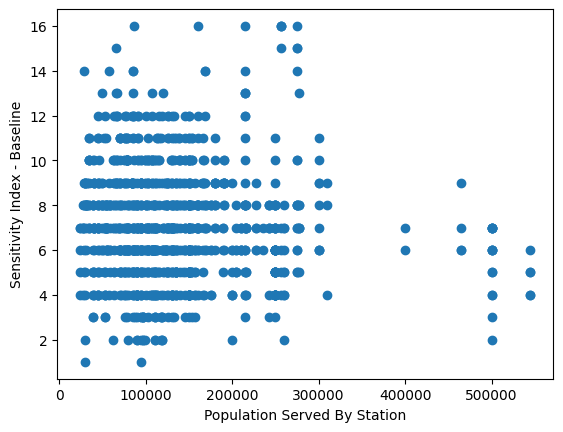

In [ ]:
# Examining Plots of Sensitivity Scores w/ Station Characterisitics;

plt.scatter(q5_eda_both_df['population'], q5_eda_both_df['b_sensitivity_x'])

plt.xlabel('Population Served By Station')
plt.ylabel("Sensitivity Index - Baseline")

Starting to leverage the "sensitivity index" provided in the data.  A numeric score providing by the authors that  rank a respondent's sensitivity to womens' cases ... we are assuming that this is build using a combination of responses on the survey (couldn't find documentation on its calculation).   There is less spread or distribution in the index among larger population stations (doesn't exceed 10) , but no overwhelming clear relationship/trend between population served and sensitivity index at baseline.

Text(0, 0.5, 'Sensitivity Index - Endline')

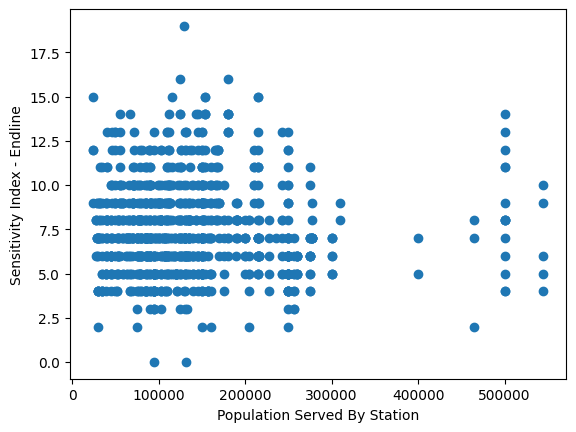

In [ ]:
# Examining Plots of Sensitivity Scores w/ Station Characterisitics;

plt.scatter(q5_eda_both_df['population'], q5_eda_both_df['e_sensitivity'])

plt.xlabel('Population Served By Station')
plt.ylabel("Sensitivity Index - Endline")

 No overwhelming clear relationship/trend between population served and sensitivity index at endline.  The "less spread" observation at baseline for larger population stations doesn't appear to hold at endline.

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Means;
# Population

q5_eda_both_df['pop_bins'] = pd.qcut(q5_eda_both_df['population'], q=4)

q5_eda_both_df['b_total_staff_bins'] = pd.qcut(q5_eda_both_df['b_total_staff'], q=4)
q5_eda_both_df['b_female_staff_bins'] = pd.qcut(q5_eda_both_df['b_female_staff'], q=4)


q5_eda_both_df['b_total_off_bins'] = pd.qcut(q5_eda_both_df['b_total_officers'], q=4)
q5_eda_both_df['b_female_off_bins'] = pd.qcut(q5_eda_both_df['b_female_officers'], q=2)

q5_eda_both_df['e_total_staff_bins'] = pd.qcut(q5_eda_both_df['e_total_staff'], q=4)
q5_eda_both_df['e_female_staff_bins'] = pd.qcut(q5_eda_both_df['e_female_staff'], q=4)


q5_eda_both_df['e_total_off_bins'] = pd.qcut(q5_eda_both_df['e_total_officers'], q=4)
q5_eda_both_df['e_female_off_bins'] = pd.qcut(q5_eda_both_df['e_female_officers'], q=2)

# Creating New Columns with difference in baseline to endline sensitivity scores and flag denoting increase in scores from baseline to endline;

q5_eda_both_df['sensitivity_diff'] = q5_eda_both_df['e_sensitivity'] - q5_eda_both_df['b_sensitivity_x']

q5_eda_both_df['sensitivity_inc'] = (q5_eda_both_df['e_sensitivity'] - q5_eda_both_df['b_sensitivity_x']) > 0


<ipython-input-22-533f73104877>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_eda_both_df['pop_bins'] = pd.qcut(q5_eda_both_df['population'], q=4)
<ipython-input-22-533f73104877>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_eda_both_df['b_total_staff_bins'] = pd.qcut(q5_eda_both_df['b_total_staff'], q=4)
<ipython-input-22-533f73104877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

To begin to view relationships between the station characteristics and perception data, we created bins of the numeric categorical data fields.  The analysis below iterates through creating views of the bins and the sensitivity index score at baseline and endline.  For the purpose of exploratory views, we chose equal cuts on the bins.

Also created 2 new variables for analysis: 1.  A difference in sensitivity score from baseline to endline (positive value denotes and improvement in the sensitivity score, and vice versa) and 2. A flag denoting an increase in sensitivity score.

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Population

groups = q5_eda_both_df.groupby(['pop_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Population Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Population Bins")
print(counts)


Average, Baseline Sensitivity Score - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      7.163793
                      Treatment    7.636872
(80000.0, 112312.0]   Control      6.438202
                      Treatment    6.947090
(112312.0, 154026.0]  Control      7.300000
                      Treatment    6.895522
(154026.0, 545000.0]  Control      6.342105
                      Treatment    7.521951
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      116
                      Treatment    179
(80000.0, 112312.0]   Control       89
                      Treatment    189
(112312.0, 154026.0]  Control       80
                      Treatment    201
(154026.0, 545000.0]  Control       76
                      Treatment    205
Name: b_sensitivity_x, dtype: int64


<ipython-input-23-b5db11265f4b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['pop_bins','treatment'])


General consistency in sensitivity across pop bins. The baseline sensitivity score for control stations was slightly lower than treatment stations for 3 of the 4 population size bins (probably noise).

In [ ]:
# Binning Station Characteristic Fields for Examining EndLine Sensitivity Score Means;
# Population

groups = q5_eda_both_df.groupby(['pop_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Population Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Population Bins")
print(counts)


<ipython-input-24-347bf142d63e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['pop_bins','treatment'])


Average, Endline Sensitivity Score - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      7.672897
                      Treatment    7.303571
(80000.0, 112312.0]   Control      7.000000
                      Treatment    7.430233
(112312.0, 154026.0]  Control      7.578947
                      Treatment    7.838542
(154026.0, 545000.0]  Control      7.459459
                      Treatment    7.431472
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      107
                      Treatment    168
(80000.0, 112312.0]   Control       82
                      Treatment    172
(112312.0, 154026.0]  Control       76
                      Treatment    192
(154026.0, 545000.0]  Control       74
                      Treatment    197
Name: e_sensitivity, dtype: int64


General consistency endline sensitivity scores across pop bins.

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Population

groups = q5_eda_both_df.groupby(['pop_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Population Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Population Bins")
print(counts)


Average, Sensitivity Score Diff - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      0.467290
                      Treatment   -0.255952
(80000.0, 112312.0]   Control      0.560976
                      Treatment    0.488372
(112312.0, 154026.0]  Control      0.400000
                      Treatment    0.921875
(154026.0, 545000.0]  Control      1.164384
                      Treatment   -0.076923
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      107
                      Treatment    168
(80000.0, 112312.0]   Control       82
                      Treatment    172
(112312.0, 154026.0]  Control       75
                      Treatment    192
(154026.0, 545000.0]  Control       73
                      Treatment    195
Name: sensitivity_diff, dtype: int64


<ipython-input-25-57976ad678c8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['pop_bins','treatment'])


Created a difference in sensitivity score field for analyisis.  The low pop and heavily pop treatment group show drops  (controls were positive, is it consequential?)

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Population

groups = q5_eda_both_df.groupby(['pop_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Population Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Population Bins")
print(counts)


<ipython-input-26-9923b68ea28d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['pop_bins','treatment'])


Average, Endline Sensitivity Increase Incidence - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      0.456897
                      Treatment    0.385475
(80000.0, 112312.0]   Control      0.505618
                      Treatment    0.428571
(112312.0, 154026.0]  Control      0.432099
                      Treatment    0.487562
(154026.0, 545000.0]  Control      0.480519
                      Treatment    0.425121
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Population Bins
pop_bins              treatment
(23564.999, 80000.0]  Control      116
                      Treatment    179
(80000.0, 112312.0]   Control       89
                      Treatment    189
(112312.0, 154026.0]  Control       81
                      Treatment    201
(154026.0, 545000.0]  Control       77
                      Treatment    207
Name: sensitivity_inc, dtype: int64


The moderately urban/treatment group had the highest incidence of 'increasers'

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Total Staff Size

groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Total Staff Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Total Staff Bins")
print(counts)


Average, Baseline Sensitivity Score - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control      7.367925
                    Treatment    7.510870
(27.0, 46.0]        Control      6.726027
                    Treatment    6.937778
(46.0, 65.0]        Control      6.588785
                    Treatment    7.012270
(65.0, 95.0]        Control      6.573333
                    Treatment    7.534653
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control      106
                    Treatment    184
(27.0, 46.0]        Control       73
                    Treatment    225
(46.0, 65.0]        Control      107
                    Treatment    163
(65.0, 95.0]        Control       75
                    Treatment    202
Name: b_sensitivity_x, dtype: int64


<ipython-input-27-80b13d63b469>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Total Staff Size

groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Total Staff Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Total Staff Bins")
print(counts)


Average, Endline Sensitivity Score - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control      8.021053
                    Treatment    8.088235
(27.0, 46.0]        Control      7.573529
                    Treatment    7.580952
(46.0, 65.0]        Control      7.184466
                    Treatment    7.006289
(65.0, 95.0]        Control      6.931507
                    Treatment    7.331579
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control       95
                    Treatment    170
(27.0, 46.0]        Control       68
                    Treatment    210
(46.0, 65.0]        Control      103
                    Treatment    159
(65.0, 95.0]        Control       73
                    Treatment    190
Name: e_sensitivity, dtype: int64


<ipython-input-28-bfe429f94967>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Total Staff Size

groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Total Staff Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Total Staff Bins")
print(counts)


Average, Sensitivity Score Diff - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control      0.663158
                    Treatment    0.635294
(27.0, 46.0]        Control      0.808824
                    Treatment    0.617225
(46.0, 65.0]        Control      0.673267
                    Treatment   -0.044304
(65.0, 95.0]        Control      0.342466
                    Treatment   -0.142105
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control       95
                    Treatment    170
(27.0, 46.0]        Control       68
                    Treatment    209
(46.0, 65.0]        Control      101
                    Treatment    158
(65.0, 95.0]        Control       73
                    Treatment    190
Name: sensitivity_diff, dtype: int64


<ipython-input-29-532e5907ccfb>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])


Police stations in treatment group with larger staff size observed declines in sensitivity scores while their controls observed an increase (was it a negative effect for these types of police stations?)

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Total Staff Size

groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Total Staff Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Total Staff Bins")
print(counts)


<ipython-input-30-c5114238710a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_staff_bins','treatment'])


Average, Endline Sensitivity Increase Incidence - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control      0.433962
                    Treatment    0.456522
(27.0, 46.0]        Control      0.506849
                    Treatment    0.486726
(46.0, 65.0]        Control      0.458716
                    Treatment    0.365854
(65.0, 95.0]        Control      0.493333
                    Treatment    0.405941
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Total Staff Bins
b_total_staff_bins  treatment
(8.999, 27.0]       Control      106
                    Treatment    184
(27.0, 46.0]        Control       73
                    Treatment    226
(46.0, 65.0]        Control      109
                    Treatment    164
(65.0, 95.0]        Control       75
                    Treatment    202
Name: sensitivity_inc, dtype: int64


Treatment stations with more staff had lower incidence of 'increasers' than their controls.

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Total Female Size

groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Female Staff Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Female Staff Bins")
print(counts)


<ipython-input-31-fa67384898da>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])


Average, Baseline Sensitivity Score - By Female Staff Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      7.118012
                     Treatment    7.235294
(2.0, 3.0]           Control      6.277778
                     Treatment    7.000000
(3.0, 4.0]           Control      6.634146
                     Treatment    6.785185
(4.0, 10.0]          Control      6.896552
                     Treatment    7.737113
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Female Staff Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      161
                     Treatment    323
(2.0, 3.0]           Control       72
                     Treatment    122
(3.0, 4.0]           Control       41
                     Treatment    135
(4.0, 10.0]          Control       87
                     Treatment    194
Name: b_sensitivity_x, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Total Female Size

groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Female Staff Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Female Staff Bins")
print(counts)


Average, Endline Sensitivity Score - By Female Staff Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      7.441379
                     Treatment    7.754098
(2.0, 3.0]           Control      7.739130
                     Treatment    7.728070
(3.0, 4.0]           Control      8.538462
                     Treatment    6.951613
(4.0, 10.0]          Control      6.709302
                     Treatment    7.344086
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Female Staff Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      145
                     Treatment    305
(2.0, 3.0]           Control       69
                     Treatment    114
(3.0, 4.0]           Control       39
                     Treatment    124
(4.0, 10.0]          Control       86
                     Treatment    186
Name: e_sensitivity, dtype: int64


<ipython-input-32-f0196c24926c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Total Female Size

groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Total Female Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Total Female Bins")
print(counts)

<ipython-input-33-184b1f396329>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])


Average, Sensitivity Score Diff - By Total Female Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      0.344828
                     Treatment    0.518033
(2.0, 3.0]           Control      1.405797
                     Treatment    0.868421
(3.0, 4.0]           Control      2.157895
                     Treatment    0.161290
(4.0, 10.0]          Control     -0.211765
                     Treatment   -0.402174
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Total Female Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      145
                     Treatment    305
(2.0, 3.0]           Control       69
                     Treatment    114
(3.0, 4.0]           Control       38
                     Treatment    124
(4.0, 10.0]          Control       85
                     Treatment    184
Name: sensitivity_diff, dtype: int64


The direction of the sensitivity score change was consistent across all bins of female staff.  Small sample size, but police stations with smallest number of female staff saw the largest increase.

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Total Female Size

groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Female Staff Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Female Staff Bins")
print(counts)


Average, Endline Sensitivity Increase Incidence - By Female Staff Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      0.422360
                     Treatment    0.489164
(2.0, 3.0]           Control      0.555556
                     Treatment    0.475410
(3.0, 4.0]           Control      0.547619
                     Treatment    0.385185
(4.0, 10.0]          Control      0.443182
                     Treatment    0.346939
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Female Staff Bins
b_female_staff_bins  treatment
(-0.001, 2.0]        Control      161
                     Treatment    323
(2.0, 3.0]           Control       72
                     Treatment    122
(3.0, 4.0]           Control       42
                     Treatment    135
(4.0, 10.0]          Control       88
                     Treatment    196
Name: sensitivity_inc, dtype: int64


<ipython-input-34-8dd40a2148a5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_staff_bins','treatment'])


Only group where 'increaser' incidence exceeded control was small female staffed stations.

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Total Officers

groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Total Officer Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Total Officer Bins")
print(counts)

<ipython-input-35-063509e6461e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])


Average, Baseline Sensitivity Score - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      7.321429
                  Treatment    7.333333
(6.0, 9.0]        Control      7.152542
                  Treatment    6.873171
(9.0, 14.0]       Control      6.618644
                  Treatment    7.347368
(14.0, 25.0]      Control      6.208333
                  Treatment    7.490066
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      112
                  Treatment    228
(6.0, 9.0]        Control       59
                  Treatment    205
(9.0, 14.0]       Control      118
                  Treatment    190
(14.0, 25.0]      Control       72
                  Treatment    151
Name: b_sensitivity_x, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Total Officers

groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Total Officer Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Total Officer Bins")
print(counts)

<ipython-input-36-a040c15c5b2b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])


Average, Endline Sensitivity Score - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      8.039604
                  Treatment    7.908257
(6.0, 9.0]        Control      7.315789
                  Treatment    7.250000
(9.0, 14.0]       Control      6.900901
                  Treatment    7.431818
(14.0, 25.0]      Control      7.542857
                  Treatment    7.342657
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      101
                  Treatment    218
(6.0, 9.0]        Control       57
                  Treatment    192
(9.0, 14.0]       Control      111
                  Treatment    176
(14.0, 25.0]      Control       70
                  Treatment    143
Name: e_sensitivity, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Total Officer Bins

groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Total Officer Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Total Officer Bins")
print(counts)

Average, Sensitivity Score Diff - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      0.693069
                  Treatment    0.582569
(6.0, 9.0]        Control      0.245614
                  Treatment    0.447368
(9.0, 14.0]       Control      0.266055
                  Treatment    0.068182
(14.0, 25.0]      Control      1.400000
                  Treatment   -0.146853
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      101
                  Treatment    218
(6.0, 9.0]        Control       57
                  Treatment    190
(9.0, 14.0]       Control      109
                  Treatment    176
(14.0, 25.0]      Control       70
                  Treatment    143
Name: sensitivity_diff, dtype: int64


<ipython-input-37-0562c6423616>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])


Stations with larger officer pools had only decline in sensitivity score.

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Total Officer Size

groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Total Officer Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Total Officer Bins")
print(counts)

<ipython-input-38-07bc6fbdd246>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_total_off_bins','treatment'])


Average, Endline Sensitivity Increase Incidence - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      0.437500
                  Treatment    0.482456
(6.0, 9.0]        Control      0.440678
                  Treatment    0.425121
(9.0, 14.0]       Control      0.450000
                  Treatment    0.400000
(14.0, 25.0]      Control      0.569444
                  Treatment    0.410596
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Total Officer Bins
b_total_off_bins  treatment
(-0.001, 6.0]     Control      112
                  Treatment    228
(6.0, 9.0]        Control       59
                  Treatment    207
(9.0, 14.0]       Control      120
                  Treatment    190
(14.0, 25.0]      Control       72
                  Treatment    151
Name: sensitivity_inc, dtype: int64


Biggest difference in increasers incidence relative to controls was among stations with larger officer pools (with lower incidence of increasers relative to control).

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Female Officers

groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Female Officer Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Female Officer Bins")
print(counts)

Average, Baseline Sensitivity Score - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      6.919463
                   Treatment    7.221698
(1.0, 4.0]         Control      6.476190
                   Treatment    7.355072
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      298
                   Treatment    636
(1.0, 4.0]         Control       63
                   Treatment    138
Name: b_sensitivity_x, dtype: int64


<ipython-input-39-743476be8115>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Female Officers

groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Female Officer Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Female Officer Bins")
print(counts)

<ipython-input-40-bef763520924>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])


Average, Endline Sensitivity Score - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      7.618705
                   Treatment    7.517471
(1.0, 4.0]         Control      6.639344
                   Treatment    7.468750
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      278
                   Treatment    601
(1.0, 4.0]         Control       61
                   Treatment    128
Name: e_sensitivity, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Female Officer Bins

groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Female Officer Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Female Officer Bins")
print(counts)

Average, Sensitivity Score Diff - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      0.747292
                   Treatment    0.327787
(1.0, 4.0]         Control      0.066667
                   Treatment    0.047619
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      277
                   Treatment    601
(1.0, 4.0]         Control       60
                   Treatment    126
Name: sensitivity_diff, dtype: int64


<ipython-input-41-50a6db4c966f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])


Directional consistent in sensitivity index changes across female officer size bins ... all groups increased with control groups having the largest diff (odd?)

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Female Officer Size

groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Female Officer Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Female Officer Bins")
print(counts)

<ipython-input-42-737da404b653>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['b_female_off_bins','treatment'])


Average, Endline Sensitivity Increase Incidence - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      0.464883
                   Treatment    0.452830
(1.0, 4.0]         Control      0.484375
                   Treatment    0.342857
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Female Officer Bins
b_female_off_bins  treatment
(-0.001, 1.0]      Control      299
                   Treatment    636
(1.0, 4.0]         Control       64
                   Treatment    140
Name: sensitivity_inc, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Total Staff Size

groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Total Staff Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Total Staff Bins")
print(counts)


<ipython-input-43-a9fbe88ecb41>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])


Average, Baseline Sensitivity Score - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control      7.208333
                    Treatment    7.514563
(35.0, 55.0]        Control      7.072289
                    Treatment    6.748663
(55.0, 75.0]        Control      6.593750
                    Treatment    7.056995
(75.0, 125.0]       Control      6.488372
                    Treatment    7.638298
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control       96
                    Treatment    206
(35.0, 55.0]        Control       83
                    Treatment    187
(55.0, 75.0]        Control       96
                    Treatment    193
(75.0, 125.0]       Control       86
                    Treatment    188
Name: b_sensitivity_x, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Total Staff Size

groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Total Staff Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Total Staff Bins")
print(counts)

<ipython-input-44-84ef610fca26>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])


Average, Endline Sensitivity Score - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control      7.835294
                    Treatment    7.868421
(35.0, 55.0]        Control      7.280488
                    Treatment    8.056497
(55.0, 75.0]        Control      7.438202
                    Treatment    6.935484
(75.0, 125.0]       Control      7.204819
                    Treatment    7.176136
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control       85
                    Treatment    190
(35.0, 55.0]        Control       82
                    Treatment    177
(55.0, 75.0]        Control       89
                    Treatment    186
(75.0, 125.0]       Control       83
                    Treatment    176
Name: e_sensitivity, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Total Staff Size

groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Total Staff Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Total Staff Bins")
print(counts)


Average, Sensitivity Score Diff - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control      0.635294
                    Treatment    0.410526
(35.0, 55.0]        Control      0.246914
                    Treatment    1.282486
(55.0, 75.0]        Control      0.943182
                    Treatment   -0.178378
(75.0, 125.0]       Control      0.650602
                    Treatment   -0.394286
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control       85
                    Treatment    190
(35.0, 55.0]        Control       81
                    Treatment    177
(55.0, 75.0]        Control       88
                    Treatment    185
(75.0, 125.0]       Control       83
                    Treatment    175
Name: sensitivity_diff, dtype: int64


<ipython-input-45-67c91abcfafa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])


Declines in sensitivity score observe for treatment groups in larger stations (consistent with findings for the the baseline staff size bins)

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Total Staff Size

groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Total Staff Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Total Staff Bins")
print(counts)


Average, Endline Sensitivity Increase Incidence - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control      0.406250
                    Treatment    0.466019
(35.0, 55.0]        Control      0.440476
                    Treatment    0.534759
(55.0, 75.0]        Control      0.505155
                    Treatment    0.350515
(75.0, 125.0]       Control      0.523256
                    Treatment    0.380952
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Total Staff Bins
e_total_staff_bins  treatment
(16.999, 35.0]      Control       96
                    Treatment    206
(35.0, 55.0]        Control       84
                    Treatment    187
(55.0, 75.0]        Control       97
                    Treatment    194
(75.0, 125.0]       Control       86
                    Treatment    189
Name: sensitivity_inc, dtype: int64


<ipython-input-46-31de2232e15a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_staff_bins','treatment'])


Lower incidence of increasers in larger stations.

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Total Female Size

groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Female Staff Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Female Staff Bins")
print(counts)


<ipython-input-47-7d8c547d6a13>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])


Average, Baseline Sensitivity Score - By Female Staff Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      6.982609
                     Treatment    7.164384
(3.0, 5.0]           Control      6.463918
                     Treatment    6.926724
(5.0, 7.0]           Control      6.970588
                     Treatment    7.632530
(7.0, 15.0]          Control      6.987654
                     Treatment    7.420382
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Female Staff Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      115
                     Treatment    219
(3.0, 5.0]           Control       97
                     Treatment    232
(5.0, 7.0]           Control       68
                     Treatment    166
(7.0, 15.0]          Control       81
                     Treatment    157
Name: b_sensitivity_x, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Total Female Size

groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Female Staff Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Female Staff Bins")
print(counts)


<ipython-input-48-9e743713380a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])


Average, Endline Sensitivity Score - By Female Staff Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      7.691589
                     Treatment    7.781095
(3.0, 5.0]           Control      7.602151
                     Treatment    7.513636
(5.0, 7.0]           Control      7.328125
                     Treatment    7.163522
(7.0, 15.0]          Control      6.986667
                     Treatment    7.503356
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Female Staff Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      107
                     Treatment    201
(3.0, 5.0]           Control       93
                     Treatment    220
(5.0, 7.0]           Control       64
                     Treatment    159
(7.0, 15.0]          Control       75
                     Treatment    149
Name: e_sensitivity, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Total Female Size

groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Total Female Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Total Female Bins")
print(counts)

<ipython-input-49-760f76e3dab0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])


Average, Sensitivity Score Diff - By Total Female Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      0.728972
                     Treatment    0.656716
(3.0, 5.0]           Control      1.336957
                     Treatment    0.595455
(5.0, 7.0]           Control      0.296875
                     Treatment   -0.487342
(7.0, 15.0]          Control     -0.121622
                     Treatment    0.114865
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Total Female Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      107
                     Treatment    201
(3.0, 5.0]           Control       92
                     Treatment    220
(5.0, 7.0]           Control       64
                     Treatment    158
(7.0, 15.0]          Control       74
                     Treatment    148
Name: sensitivity_diff, dtype: int64


No clear relationship for female staff sizes.

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Total Female Size

groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Female Staff Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Female Staff Bins")
print(counts)


<ipython-input-50-2c7047c44b96>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_staff_bins','treatment'])


Average, Endline Sensitivity Increase Incidence - By Female Staff Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      0.478261
                     Treatment    0.493151
(3.0, 5.0]           Control      0.530612
                     Treatment    0.465517
(5.0, 7.0]           Control      0.426471
                     Treatment    0.365269
(7.0, 15.0]          Control      0.414634
                     Treatment    0.373418
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Female Staff Bins
e_female_staff_bins  treatment
(-0.001, 3.0]        Control      115
                     Treatment    219
(3.0, 5.0]           Control       98
                     Treatment    232
(5.0, 7.0]           Control       68
                     Treatment    167
(7.0, 15.0]          Control       82
                     Treatment    158
Name: sensitivity_inc, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Total Officers

groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Total Officer Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Total Officer Bins")
print(counts)

<ipython-input-51-922eca74bcf4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])


Average, Baseline Sensitivity Score - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      7.429825
                  Treatment    7.267442
(7.0, 10.0]       Control      6.555556
                  Treatment    6.658537
(10.0, 13.0]      Control      6.970000
                  Treatment    7.181208
(13.0, 26.0]      Control      6.053333
                  Treatment    7.738916
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      114
                  Treatment    258
(7.0, 10.0]       Control       72
                  Treatment    164
(10.0, 13.0]      Control      100
                  Treatment    149
(13.0, 26.0]      Control       75
                  Treatment    203
Name: b_sensitivity_x, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Total Officers

groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Total Officer Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Total Officer Bins")
print(counts)

Average, Endline Sensitivity Score - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      7.873786
                  Treatment    7.775000
(7.0, 10.0]       Control      7.723077
                  Treatment    7.773585
(10.0, 13.0]      Control      7.212121
                  Treatment    6.978723
(13.0, 26.0]      Control      6.888889
                  Treatment    7.343915
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      103
                  Treatment    240
(7.0, 10.0]       Control       65
                  Treatment    159
(10.0, 13.0]      Control       99
                  Treatment    141
(13.0, 26.0]      Control       72
                  Treatment    189
Name: e_sensitivity, dtype: int64


<ipython-input-52-9d3bf0ab36dd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Total Officer Bins

groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Total Officer Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Total Officer Bins")
print(counts)

Average, Sensitivity Score Diff - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      0.407767
                  Treatment    0.552301
(7.0, 10.0]       Control      1.261538
                  Treatment    1.113208
(10.0, 13.0]      Control      0.226804
                  Treatment   -0.278571
(13.0, 26.0]      Control      0.902778
                  Treatment   -0.354497
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      103
                  Treatment    239
(7.0, 10.0]       Control       65
                  Treatment    159
(10.0, 13.0]      Control       97
                  Treatment    140
(13.0, 26.0]      Control       72
                  Treatment    189
Name: sensitivity_diff, dtype: int64


<ipython-input-53-6aa0154fc395>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])


Stations with higher number of officers appearing to have decreases in sensitivty from baseline to endline (control increased and treatment decreased)

In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Total Officer Size

groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Total Officer Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Total Officer Bins")
print(counts)

Average, Endline Sensitivity Increase Incidence - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      0.403509
                  Treatment    0.459459
(7.0, 10.0]       Control      0.583333
                  Treatment    0.560976
(10.0, 13.0]      Control      0.431373
                  Treatment    0.340000
(13.0, 26.0]      Control      0.506667
                  Treatment    0.364532
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Total Officer Bins
e_total_off_bins  treatment
(1.999, 7.0]      Control      114
                  Treatment    259
(7.0, 10.0]       Control       72
                  Treatment    164
(10.0, 13.0]      Control      102
                  Treatment    150
(13.0, 26.0]      Control       75
                  Treatment    203
Name: sensitivity_inc, dtype: int64


<ipython-input-54-521fc7ee852f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_total_off_bins','treatment'])


Much lower incidence of 'increasers' in larger officer staffed stations.

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Female Officers

groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Female Officer Bins")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Female Officer Bins")
print(counts)

Average, Baseline Sensitivity Score - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      6.827957
                   Treatment    7.129693
(1.0, 6.0]         Control      6.890244
                   Treatment    7.606383
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      279
                   Treatment    586
(1.0, 6.0]         Control       82
                   Treatment    188
Name: b_sensitivity_x, dtype: int64


<ipython-input-55-04acbb9a1c66>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Female Officers

groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Female Officer Bins")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Female Officer Bins")
print(counts)

Average, Endline Sensitivity Score - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      7.366412
                   Treatment    7.442831
(1.0, 6.0]         Control      7.701299
                   Treatment    7.713483
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      262
                   Treatment    551
(1.0, 6.0]         Control       77
                   Treatment    178
Name: e_sensitivity, dtype: int64


<ipython-input-56-e6d15c4cf3a8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Score Difference Means;
# Female Officer Bins

groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Diff - By Female Officer Bins")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Diff - By Female Officer Bins")
print(counts)

<ipython-input-57-a275465ed1e8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])


Average, Sensitivity Score Diff - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      0.609195
                   Treatment    0.327869
(1.0, 6.0]         Control      0.684211
                   Treatment    0.129213
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Diff - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      261
                   Treatment    549
(1.0, 6.0]         Control       76
                   Treatment    178
Name: sensitivity_diff, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Sensitivity Positive Shift Incidence;
# Female Officer Size

groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Endline Sensitivity Increase Incidence - By Female Officer Bins")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Endline Sensitivity Increase Incidence - By Female Officer Bins")
print(counts)

<ipython-input-58-63f30083211f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = q5_eda_both_df.groupby(['e_female_off_bins','treatment'])


Average, Endline Sensitivity Increase Incidence - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      0.457143
                   Treatment    0.442177
(1.0, 6.0]         Control      0.506024
                   Treatment    0.404255
Name: sensitivity_inc, dtype: float64
Counts, Endline Sensitivity Increase Incidence - By Female Officer Bins
e_female_off_bins  treatment
(-0.001, 1.0]      Control      280
                   Treatment    588
(1.0, 6.0]         Control       83
                   Treatment    188
Name: sensitivity_inc, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Women Led Help Desk

groups = q5_eda_both_df.groupby(['women_whd','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Women Head Desk")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Women Head Desks")
print(counts)

Average, Baseline Sensitivity Score - By Women Head Desk
women_whd  treatment
0.0        Control      6.842105
           Treatment    7.299213
1.0        Treatment    7.193384
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Women Head Desks
women_whd  treatment
0.0        Control      361
           Treatment    381
1.0        Treatment    393
Name: b_sensitivity_x, dtype: int64


Women led help desk was a treatment feature, so assuming we should comparing treatment for whd=1 to treatment for whd=0.

In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Women Led Help Desk

groups = q5_eda_both_df.groupby(['women_whd','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Women Head Desk")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Women Head Desks")
print(counts)

Average, Endline Sensitivity Score - By Women Head Desk
women_whd  treatment
0.0        Control      7.442478
           Treatment    7.495798
1.0        Treatment    7.521505
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Women Head Desks
women_whd  treatment
0.0        Control      339
           Treatment    357
1.0        Treatment    372
Name: e_sensitivity, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Women Led Help Desk

groups = q5_eda_both_df.groupby(['women_whd','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Difference - By Women Head Desk")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Difference - By Women Head Desks")
print(counts)

Average, Sensitivity Score Difference - By Women Head Desk
women_whd  treatment
0.0        Control      0.626113
           Treatment    0.213483
1.0        Treatment    0.342318
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Difference - By Women Head Desks
women_whd  treatment
0.0        Control      337
           Treatment    356
1.0        Treatment    371
Name: sensitivity_diff, dtype: int64


Women led helpdesks had largest increase in sensitivity scores among treatment groups.  But, the control group had the highest increase

In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Women Led Help Desk

groups = q5_eda_both_df.groupby(['women_whd','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Sensitivity Increase Incidence - By Women Head Desk")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Sensitivity Increase Incidence - By Women Head Desks")
print(counts)

Average, Sensitivity Increase Incidence - By Women Head Desk
women_whd  treatment
0.0        Control      0.468320
           Treatment    0.431937
1.0        Treatment    0.434010
Name: sensitivity_inc, dtype: float64
Counts, Sensitivity Increase Incidence - By Women Head Desks
women_whd  treatment
0.0        Control      363
           Treatment    382
1.0        Treatment    394
Name: sensitivity_inc, dtype: int64


Almost identical increase in sensitivity index increasers among whd=0 and whd=1 treatment groups

In [ ]:
# Binning Station Characteristic Fields for Examining Baseline Sensitivity Score Means;
# Urban vs Rural

groups = q5_eda_both_df.groupby(['urban','treatment'])
averages = groups['b_sensitivity_x'].mean()
print("Average, Baseline Sensitivity Score - By Urban/Rural")
print(averages)

counts = groups['b_sensitivity_x'].count()
print("Counts, Baseline Sensitivity Score - By Urban/Rural")
print(counts)

Average, Baseline Sensitivity Score - By Urban/Rural
urban  treatment
Rural  Control      7.205000
       Treatment    7.157500
Urban  Control      6.391304
       Treatment    7.339572
Name: b_sensitivity_x, dtype: float64
Counts, Baseline Sensitivity Score - By Urban/Rural
urban  treatment
Rural  Control      200
       Treatment    400
Urban  Control      161
       Treatment    374
Name: b_sensitivity_x, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Urban vs Rural

groups = q5_eda_both_df.groupby(['urban','treatment'])
averages = groups['e_sensitivity'].mean()
print("Average, Endline Sensitivity Score - By Urban/Rural")
print(averages)

counts = groups['e_sensitivity'].count()
print("Counts, Endline Sensitivity Score - By Urban/Rural")
print(counts)

Average, Endline Sensitivity Score - By Urban/Rural
urban  treatment
Rural  Control      7.588235
       Treatment    7.892183
Urban  Control      7.263158
       Treatment    7.111732
Name: e_sensitivity, dtype: float64
Counts, Endline Sensitivity Score - By Urban/Rural
urban  treatment
Rural  Control      187
       Treatment    371
Urban  Control      152
       Treatment    358
Name: e_sensitivity, dtype: int64


In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Urban vs Rural

groups = q5_eda_both_df.groupby(['urban','treatment'])
averages = groups['sensitivity_diff'].mean()
print("Average, Sensitivity Score Difference - By Urban/Rural")
print(averages)

counts = groups['sensitivity_diff'].count()
print("Counts, Sensitivity Score Difference - By Urban/Rural")
print(counts)

Average, Sensitivity Score Difference - By Urban/Rural
urban  treatment
Rural  Control      0.413978
       Treatment    0.740541
Urban  Control      0.887417
       Treatment   -0.198880
Name: sensitivity_diff, dtype: float64
Counts, Sensitivity Score Difference - By Urban/Rural
urban  treatment
Rural  Control      186
       Treatment    370
Urban  Control      151
       Treatment    357
Name: sensitivity_diff, dtype: int64


Urban stations had the only case of a decline in sensitivity during the study (negative impact? Also may be correlated/confounded with high number of officers negative relationship too).

In [ ]:
# Binning Station Characteristic Fields for Examining Endline Sensitivity Score Means;
# Urban vs Rural

groups = q5_eda_both_df.groupby(['urban','treatment'])
averages = groups['sensitivity_inc'].mean()
print("Average, Sensitivity Increase Incidence - By Urban/Rural")
print(averages)

counts = groups['sensitivity_inc'].count()
print("Counts, Sensitivity Increase Incidence - By Urban/Rural")
print(counts)

Average, Sensitivity Increase Incidence - By Urban/Rural
urban  treatment
Rural  Control      0.437811
       Treatment    0.468828
Urban  Control      0.506173
       Treatment    0.394667
Name: sensitivity_inc, dtype: float64
Counts, Sensitivity Increase Incidence - By Urban/Rural
urban  treatment
Rural  Control      201
       Treatment    401
Urban  Control      162
       Treatment    375
Name: sensitivity_inc, dtype: int64


Urban Stations had the lowest incidence of increasers.